<a href="https://colab.research.google.com/github/sonzwon/TIL_DL/blob/master/oxford_pets_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [13]:
df = pd.read_csv('/content/drive/MyDrive/colab_commit/TIL_DL/data/annotations/list.txt', skiprows=6, delimiter=' ', header=None)
df.columns = ['file_name','id','species','bread']
df

,file_name,id,species,bread
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [14]:
df['species'].value_counts().sort_index()

1    2371
2    4978
Name: species, dtype: int64

([<matplotlib.axis.XTick at 0x7f7bbbeec190>,
 [Text(0, 0, '1'), Text(0, 0, '2')])

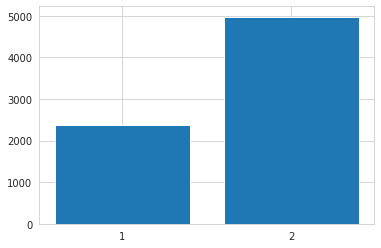

In [15]:
value_counts = df['species'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

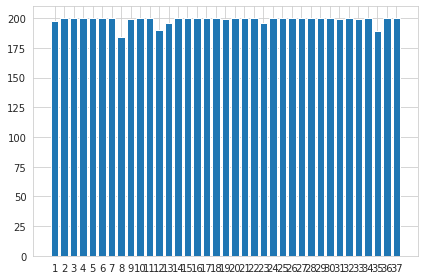

In [16]:
value_counts = df['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()
plt.show()

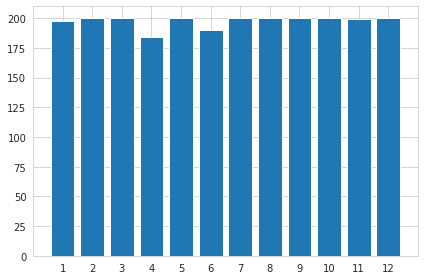

In [17]:
# 고양이 종류
value_counts = df[df['species']==1]['bread'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()
plt.show()

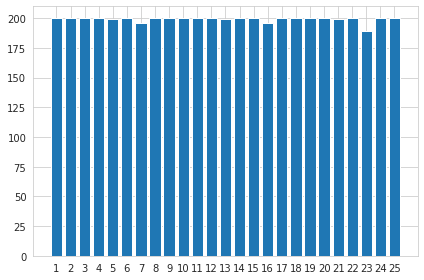

In [18]:
# 강아지 종류
value_counts = df[df['species']==2]['bread'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()
plt.show()

In [19]:
import os
from glob import glob

In [20]:
img_dir = '/content/drive/MyDrive/colab_commit/TIL_DL/data/images/'
bbox_dir = '/content/drive/MyDrive/colab_commit/TIL_DL/data/annotations/xmls/'
seg_dir = '/content/drive/MyDrive/colab_commit/TIL_DL/data/annotations/trimaps/'

In [21]:
img_files = glob(img_dir + '*.jpg')
len(img_files)

7390

In [22]:
seg_files = glob(seg_dir + '*.png')
len(seg_files)

7390

In [23]:
bbox_files = glob(bbox_dir + '*.xml')
len(bbox_files)

3686

In [24]:
import cv2
import xml.etree.ElementTree as et   #xml파일 parsing
from matplotlib.patches import Rectangle

In [25]:
img_path = img_files[90]
img_path

'/content/drive/MyDrive/colab_commit/TIL_DL/data/images/english_cocker_spaniel_117.jpg'

In [26]:
bbox_files[90]

'/content/drive/MyDrive/colab_commit/TIL_DL/data/annotations/xmls/Russian_Blue_185.xml'

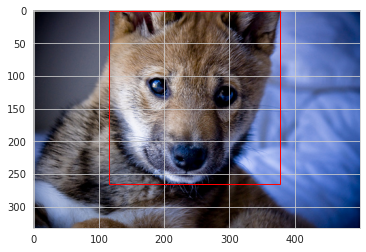

In [27]:
img_path = img_files[110]
bbox_path = img_path.replace('images','annotations/xmls').replace('jpg','xml')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

tree = et.parse(bbox_path)

xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax-xmin
rect_h = ymax-ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(img)

plt.show()

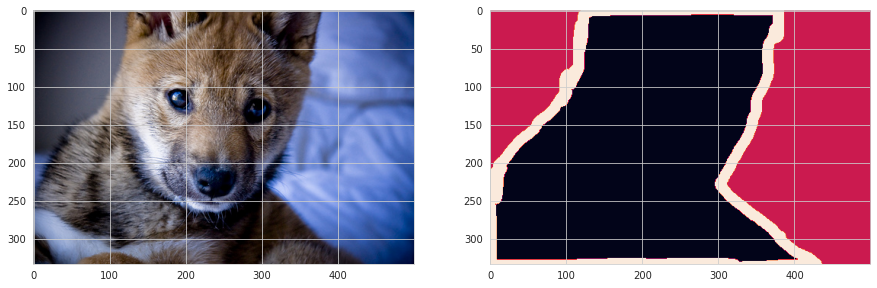

In [28]:
img_path = img_files[110]
seg_path = img_path.replace('images','annotations/trimaps').replace('jpg', 'png')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(seg_map)

plt.show()

In [29]:
from sklearn.model_selection import KFold

In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

df['fold'] = -1
# t : train dataset
# v : validation dataset
for  idx,(t,v) in enumerate(kf.split(df),1):
    print(t,v, len(v))
    df.loc[v, 'fold'] = idx

[   1    2    3 ... 7346 7347 7348] [   0    8   14 ... 7339 7341 7345] 1470
[   0    1    2 ... 7346 7347 7348] [  12   15   26 ... 7340 7342 7344] 1470
[   0    1    2 ... 7345 7346 7348] [   6    7   18 ... 7333 7343 7347] 1470
[   0    3    4 ... 7345 7347 7348] [   1    2   10 ... 7335 7336 7346] 1470
[   0    1    2 ... 7345 7346 7347] [   3    4    5 ... 7334 7338 7348] 1469


In [31]:
#학습데이터로 쓰인 데이터의 수
print(len(df[df['fold']==1]))

1470


In [32]:
#학습데이터로 쓰이지 않은 데이터의 수
print(len(df[df['fold']!=1]))

5879


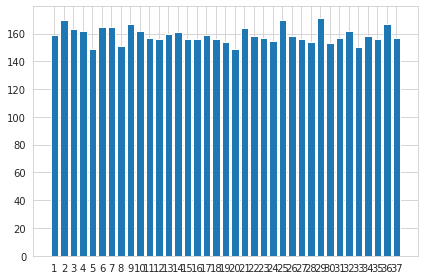

In [33]:
# K-Fold가 균등하게 분포되었는지 확인
value_counts = df[df['fold']!=5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()
plt.show()

In [34]:
# 폴드안의 데이터가 더욱 균등하게 분포되게 하려면
from sklearn.model_selection import StratifiedKFold

In [35]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

df['fold'] = -1
# t : train dataset
# v : validation dataset
for  idx,(t,v) in enumerate(skf.split(df, df['id']),1):
    print(t,v, len(v))
    df.loc[v, 'fold'] = idx

[   0    1    3 ... 7346 7347 7348] [   2    7    8 ... 7326 7337 7345] 1470
[   1    2    3 ... 7346 7347 7348] [   0   12   13 ... 7323 7335 7339] 1470
[   0    2    3 ... 7345 7347 7348] [   1   14   19 ... 7341 7343 7346] 1470
[   0    1    2 ... 7346 7347 7348] [   3    4    5 ... 7334 7338 7342] 1470
[   0    1    2 ... 7343 7345 7346] [   9   21   23 ... 7344 7347 7348] 1469


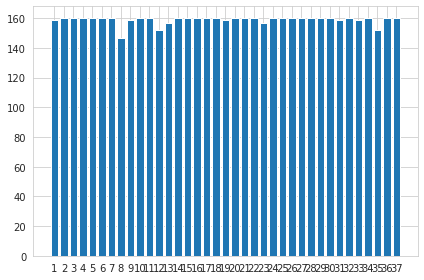

In [36]:
value_counts = df[df['fold']!=5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()
plt.show()

- KFold보다 StratifiedKFold가 데이터를 더 균등하게 분포시키는 것을 알 수 있다.

In [37]:
df.to_csv('/content/drive/MyDrive/colab_commit/TIL_DL/data/kfolds.csv', index=False)

# Bulid Classification Pipeline

### 1. Data Loader

In [40]:
import math
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

In [41]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, batch_size, csv_path, fold, img_size, mode='train', shuffle=True):
        self.batch_size = batch_size
        self.fold = fold
        self.img_size = img_size
        self.mode = mode
        self.shuffle = shuffle 
        
        self.df = pd.read_csv(csv_path)
        
        #필요한 데이터만 사용하기
        if self.mode == 'train':
            self.df = self.df[self.df['fold']!=self.fold]
        elif self.mode == 'val':
            self.df = self.df[self.df['fold']==self.fold]
        
        #### Remove invalid files
        #### https://github.com/tensorflow/models/issues/3134
        invalid_filenames = [
            'Egyptian_Mau_14',
            'Egyptian_Mau_139',
            'Egyptian_Mau_145',
            'Egyptian_Mau_156',
            'Egyptian_Mau_167',
            'Egyptian_Mau_177',
            'Egyptian_Mau_186',
            'Egyptian_Mau_191',
            'Abyssinian_5',
            'Abyssinian_34',
            'chihuahua_121',
            'beagle_116'
        ]
        self.df = self.df[~self.df['file_name']. \
                          isin(invalid_filenames)]
        self.on_epoch_end()
        
    def __len__(self):
        # len(self.df) / self.batch_size값이 딱 떨어지지 않을 수 있으니 올림
        return math.ceil(len(self.df) / self.batch_size)
    
    # return a complete batch
    def __getitem__(self, idx):
        strt = idx * self.batch_size
        fin = (idx + 1) * self.batch_size
        # batch에 대한 모든 데이터
        data = self.df.iloc[strt:fin]
        
        batch_x, batch_y = self.get_data(data)
        
        return np.array(batch_x), np.array(batch_y)
   
    # batch에 있는 모든 데이터의 이미지와 라벨을 읽어서 반환하는 함수
    def get_data(self, data):
        batch_x = []
        batch_y = []
        for _, r in data.iterrows():
            file_name = r['file_name']
            img = cv2.imread(f'/content/drive/MyDrive/colab_commit/TIL_DL/data/images/{file_name}.jpg')
            # BGR TO RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # 이미지들의 사이즈를 동일하게 리사이즈
            img = cv2.resize(img, (self.img_size, self.img_size))
            # rescale
            img = img.astype('float32')
            img = img/255.
            # label (고양이 1->0, 강아지 2->1)
            label = int(r['species'])-1
            
            batch_x.append(img)
            batch_y.append(label)
            
        return batch_x, batch_y
            
    
    def on_epoch_end(self):
        if self.shuffle == True:
            self.df = self.df.sample(frac=1).reset_index(drop=True)

In [42]:
# 함수 동작 확인
csv_path = '/content/drive/MyDrive/colab_commit/TIL_DL/data/kfolds.csv'
train_generator = DataGenerator(batch_size=9,
                               csv_path=csv_path,
                               fold=1,
                               img_size=256,
                               mode='train',
                               shuffle=True)

In [43]:
print(len(train_generator))

653


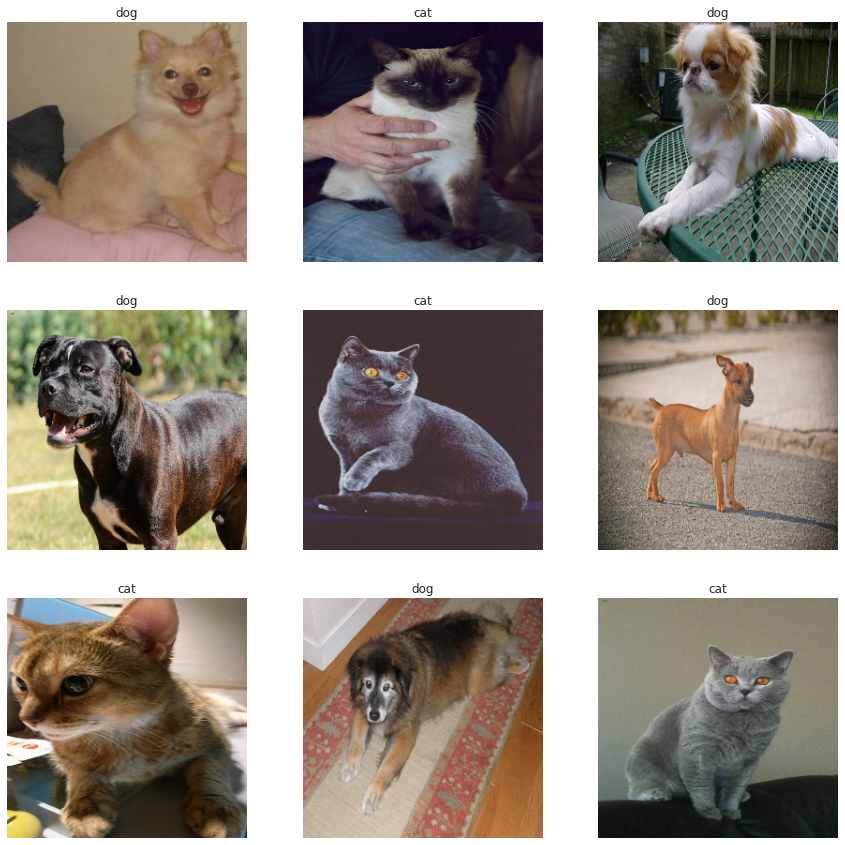

In [44]:
class_name = ['cat', 'dog']

for batch in train_generator:
    X,y = batch
    plt.figure(figsize=(15,15))
    
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(X[i])
        plt.title(class_name[y[i]])
        plt.axis('off')
    break

### 2. Model Definition

In [45]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [46]:
def get_sequential_model(input_shape): 
    model = keras.Sequential(
        [
            # Input
            layers.Input(input_shape),
            
            # 1st Conv block
            layers.Conv2D(64, 3, strides=1, activation='relu', padding='same'),
            layers.Conv2D(64, 3, strides=1, activation='relu', padding='same'),
            layers.MaxPool2D(),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            
            # 2nd Conv block
            layers.Conv2D(128, 3, strides=1, activation='relu', padding='same'),
            layers.Conv2D(128, 3, strides=1, activation='relu', padding='same'),
            layers.MaxPool2D(),
            layers.BatchNormalization(),
            layers.Dropout(0.3),           
            
            # Classifier
            layers.GlobalMaxPool2D(),
            layers.Dense(128, activation='relu'),
            layers.Dense(1, activation='sigmoid')
        ]
    )
    
    return model
    

input_shape = (256, 256, 3)
model = get_sequential_model(input_shape)

model.summary()

'''
[ Functional API ]
def get_functional_model(input_shape):
    inputs = keras.Input(input_shape)
    
    # 1st Conv block
    x = layers.Conv2D(64, 3, strides=1, activation='relu', padding='same')(inputs)
    x = layers.Conv2D(64, 3, strides=1, activation='relu', padding='same')(x)
    x = layers.MaxPool2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    # 2nd Conv block
    x = layers.Conv2D(128, 3, strides=1, activation='relu', padding='same')(x)
    x = layers.Conv2D(128, 3, strides=1, activation='relu', padding='same')(x)
    x = layers.MaxPool2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # Classifier
    x = layers.GlobalMaxPool2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs, outputs)
    
    return model

input_shape = (256, 256, 3)
model = get_functional_model(input_shape)

model.summary()



[ Model subclassing ] 
class SimpleCNN(keras.Model):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        self.conv_block_1 = keras.Sequential(
            [
                layers.Conv2D(64, 3, strides=1, activation='relu', padding='same'),
                layers.Conv2D(64, 3, strides=1, activation='relu', padding='same'),
                layers.MaxPool2D(),
                layers.BatchNormalization(),
                layers.Dropout(0.5)             
            ], name='conv_block_1'
        )
        
        self.conv_block_2 = keras.Sequential(
            [
                layers.Conv2D(128, 3, strides=1, activation='relu', padding='same'),
                layers.Conv2D(128, 3, strides=1, activation='relu', padding='same'),
                layers.MaxPool2D(),
                layers.BatchNormalization(),
                layers.Dropout(0.3)                        
            ], name='conv_block_2'
        )
        
        self.classifier = keras.Sequential(
            [
                layers.GlobalMaxPool2D(),
                layers.Dense(128, activation='relu'),
                layers.Dense(1, activation='sigmoid')
            ], name='classifier'
        )
    
    def call(self, input_tensor, training=False):
        x = self.conv_block_1(input_tensor)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        
        return x

input_shape = (None, 256, 256, 3)
model = SimpleCNN()
model.build(input_shape)

model.summary()
'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     7

"\n[ Functional API ]\ndef get_functional_model(input_shape):\n    inputs = keras.Input(input_shape)\n    \n    # 1st Conv block\n    x = layers.Conv2D(64, 3, strides=1, activation='relu', padding='same')(inputs)\n    x = layers.Conv2D(64, 3, strides=1, activation='relu', padding='same')(x)\n    x = layers.MaxPool2D()(x)\n    x = layers.BatchNormalization()(x)\n    x = layers.Dropout(0.5)(x)\n\n    # 2nd Conv block\n    x = layers.Conv2D(128, 3, strides=1, activation='relu', padding='same')(x)\n    x = layers.Conv2D(128, 3, strides=1, activation='relu', padding='same')(x)\n    x = layers.MaxPool2D()(x)\n    x = layers.BatchNormalization()(x)\n    x = layers.Dropout(0.3)(x)\n\n    # Classifier\n    x = layers.GlobalMaxPool2D()(x)\n    x = layers.Dense(128, activation='relu')(x)\n    outputs = layers.Dense(1, activation='sigmoid')(x)\n    \n    model = keras.Model(inputs, outputs)\n    \n    return model\n\ninput_shape = (256, 256, 3)\nmodel = get_functional_model(input_shape)\n\nmodel.s

In [47]:
#Model compiling
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)

### 3. Training Script

In [48]:
csv_path = '/content/drive/MyDrive/colab_commit/TIL_DL/data/kfolds.csv'
train_generator = DataGenerator(
    fold=1,
    mode='train',
    csv_path=csv_path,
    batch_size=64,
    img_size=256,
    shuffle=True)

valid_generator = DataGenerator(
    fold=1,
    mode='val',
    csv_path=csv_path,
    batch_size=64,
    img_size=256,
    shuffle=True)

In [49]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, verbose=1,
    mode='min', restore_best_weights=False
)

In [50]:
reduce_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=10, verbose=1,
    mode='min', min_lr=0.001
)

In [51]:
filepath = '{epoch:02d}-{val_loss:.2f}.hdf5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath, monitor='val_loss', werbose=1, save_best_only=True,
    save_weights_only=False, mode='min'
)

In [52]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[
        early_stopping,
        reduce_on_plateau,
        model_checkpoint
    ],
    verbose=1
)

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
history = history.history

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='train')
plt.plot(history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Accuracy")
plt.show()

#Data Augmentation

Albumentations

In [1]:
!pip install albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
import os
import math
import random

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations

import albumentations as A

os.environ['CUDA_VISIBLE_DEVICE'] ='1'

In [75]:
class Augmentation:
    def __init__(self, size, mode='train'):
        if mode == 'train':
            # Declare an augmentation pipeline
            self.transform = A.Compose([
                A.HorizontalFlip(p=0.5),
                A.ShiftScaleRotate(
                    p=0.5,
                    shift_limit=0.05,
                    scale_limit=0.05,
                    rotate_limit=15,
                ),
                A.CoarseDropout(
                    p=0.5,
                    max_holes=8,
                    max_height=int(0.1 * size),
                    max_width=int(0.1 * size)
                ),
                A.RandomBrightnessContrast(p=0.2),
            ])
    def __call__(self, **kwargs):
        if self.transform:
            augmented = self.transform(**kwargs)
            img = augmented['image']
            return img

In [80]:
##data augmentation update
class DataGenerator(keras.utils.Sequence):
    def __init__(self, batch_size, csv_path, img_size,
                 fold, mode='train', shuffle=True):
        self.fold = fold
        self.shuffle = shuffle
        self.mode = mode
        self.batch_size = batch_size
        self.img_size = img_size
        
        self.df = pd.read_csv(csv_path)
        if self.mode == 'train':    
            self.df = self.df[self.df['fold'] != self.fold]
        elif self.mode == 'val':
            self.df = self.df[self.df['fold'] == self.fold]
        
        #### Remove invalid files
        #### https://github.com/tensorflow/models/issues/3134
        invalid_filenames = [
            'Egyptian_Mau_14',
            'Egyptian_Mau_139',
            'Egyptian_Mau_145',
            'Egyptian_Mau_156',
            'Egyptian_Mau_167',
            'Egyptian_Mau_177',
            'Egyptian_Mau_186',
            'Egyptian_Mau_191',
            'Abyssinian_5',
            'Abyssinian_34',
            'chihuahua_121',
            'beagle_116'
        ]
        self.df = self.df[~self.df['file_name'].isin(invalid_filenames)]
        self.transform = Augmentation(img_size, mode)
        
        self.on_epoch_end()
            
    def __len__(self):
        return math.ceil(len(self.df) / self.batch_size)
    
    def __getitem__(self, idx):
        strt = idx * self.batch_size
        fin = (idx + 1) * self.batch_size
        data = self.df.iloc[strt:fin]
        
        batch_x, batch_y = self.get_data(data)

        return np.array(batch_x), np.array(batch_y)
        
    def get_data(self, data):
        batch_x = []
        batch_y = []
    
        for _, r in data.iterrows():
            file_name = r['file_name']

            image = cv2.imread(f'/content/drive/MyDrive/colab_commit/TIL_DL/data/images/{file_name}.jpg')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (self.img_size, self.img_size))
            
            if self.mode == 'train':
                image = image.astype('uint8')
                image = self.transform(image=image)
                
            image = image.astype('float32')
            image = image / 255.

            label = int(r['species']) - 1

            batch_x.append(image)
            batch_y.append(label)
        
        return batch_x, batch_y
        
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
            
csv_path = '/content/drive/MyDrive/colab_commit/TIL_DL/data/kfolds.csv'
train_generator = DataGenerator(
    fold=1,
    mode='train',
    csv_path=csv_path,
    batch_size=128,
    img_size=256,
    shuffle=True)

valid_generator = DataGenerator(
    fold=1,
    mode='val',
    csv_path=csv_path,
    batch_size=128,
    img_size=256,
    shuffle=True)

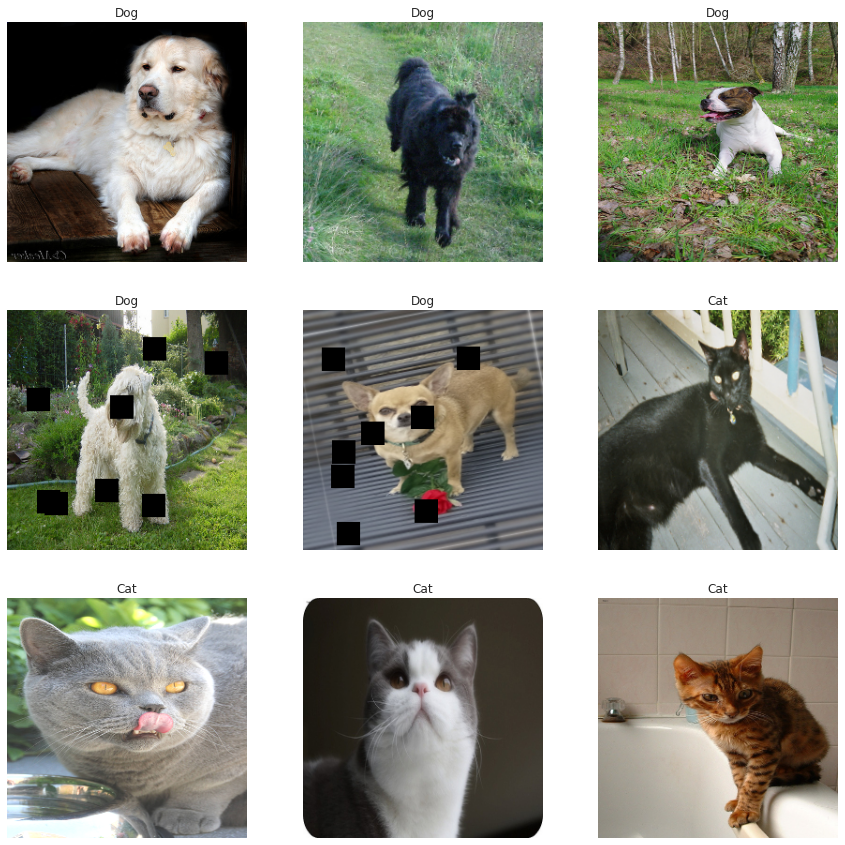

In [81]:
class_names = ['Cat', 'Dog']

for batch in train_generator:
    X, y = batch
    plt.figure(figsize=(15, 15))

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(X[i])
        plt.title(class_names[y[i]])
        plt.axis('off')
    break

In [87]:
def get_sequential_model(input_shape):
    model = keras.Sequential(
        [
            # Input
            layers.Input(input_shape),

            # 1st Conv block
            layers.Conv2D(64, 3, strides=1, activation='relu', padding='same'),
            layers.Conv2D(64, 3, strides=1, activation='relu', padding='same'),
            layers.MaxPool2D(),
            layers.BatchNormalization(),
            layers.Dropout(0.5),

            # 2nd Conv block
            layers.Conv2D(128, 3, strides=1, activation='relu', padding='same'),
            layers.Conv2D(128, 3, strides=1, activation='relu', padding='same'),
            layers.MaxPool2D(),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
        
            # Classfier
            layers.GlobalMaxPool2D(),
            layers.Dense(128, activation='relu'),
            layers.Dense(1, activation='sigmoid')
        ]
    )

    return model

input_shape = (256, 256, 3)
model = get_sequential_model(input_shape)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 conv2d_17 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 128, 128, 64)      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 128, 128, 128)    

In [ ]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    verbose=1
)

Epoch 1/10
